<a href="https://colab.research.google.com/github/illyesa/Bootcamp_GENAI_Fev2025/blob/main/DailyChallengeW3D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

files.upload()

Saving train.csv to train.csv


{'train.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\r\

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [26]:
# Data Import and Cleaning
data = pd.read_csv("train.csv")

missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

data['Age'] = data['Age'].fillna(data['Age'].median())
data['Cabin'] = data['Cabin'].fillna('Unknown')
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


Age         177
Cabin       687
Embarked      2
dtype: int64


In [36]:
# Exploratory Data Analysis

sex_distribution = data['Sex'].value_counts()
pclass_distribution = data['Pclass'].value_counts()
print(f"{data.describe()}\n{sex_distribution}\n{pclass_distribution}")

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    21

In [37]:
# Statistical Analysis
survival_by_sex = data.groupby('Sex')['Survived'].mean()
survival_by_pclass = data.groupby('Pclass')['Survived'].mean()
print(survival_by_sex)
print(survival_by_pclass)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [39]:
survival_male = data[data['Sex'] == 'male']['Survived']
survival_female = data[data['Sex'] == 'female']['Survived']
t_stat, p_value = ttest_ind(survival_male, survival_female)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -19.297816550123354
p-value: 1.4060661308802594e-69


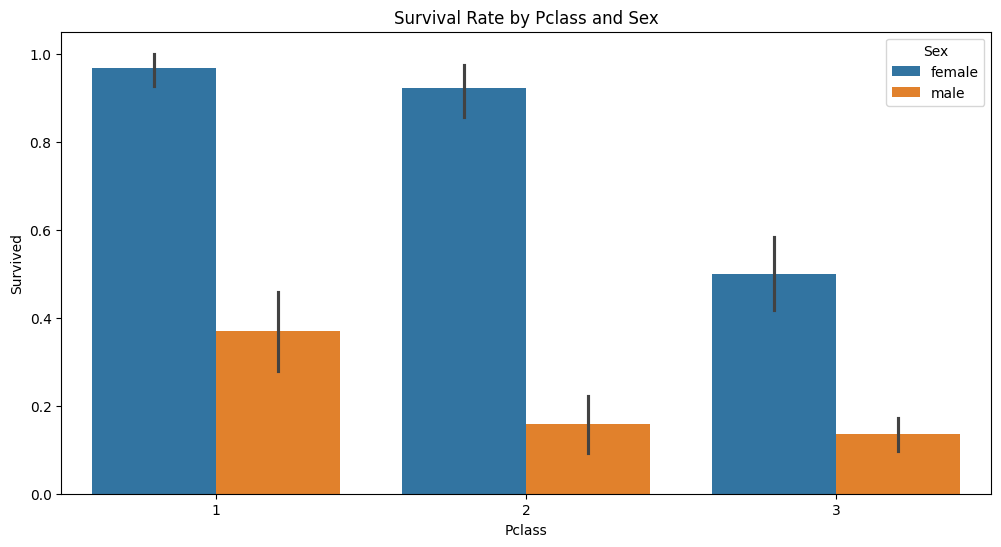

In [28]:
# Advanced Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data)
plt.title('Survival Rate by Pclass and Sex')
plt.show()

In [40]:
# Matrix Operations Example
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(eigenvalues)
print(eigenvectors)

[1.86627482 1.64130589 0.9997818  0.961656   0.35411724 0.63116859
 0.54569567]
[[ 0.03960582 -0.08731937 -0.95506628  0.26673466 -0.01322237 -0.03790239
  -0.07678745]
 [ 0.41432513  0.06681171  0.21894767  0.68871437 -0.2091503   0.3751158
  -0.34227125]
 [-0.63019418  0.16611961 -0.01849286  0.07256044 -0.73920803  0.15095606
   0.02088835]
 [ 0.24936128 -0.45644813 -0.09859776 -0.56763592 -0.27729959  0.48631779
  -0.29007232]
 [ 0.02676682  0.61417459 -0.07193483 -0.28899526  0.02948159 -0.19225029
  -0.70395376]
 [ 0.13601043  0.58937071 -0.15439946 -0.15977932  0.14147586  0.60896472
   0.44036492]
 [ 0.59010593  0.16553744 -0.02886189 -0.13417115 -0.55845606 -0.43676152
   0.32078599]]


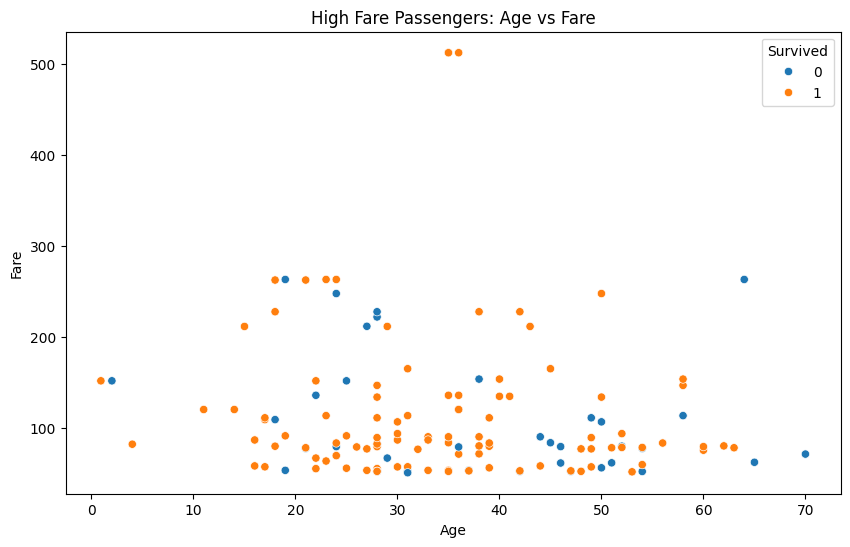

In [32]:
# Integrating NumPy with Pandas and Matplotlib
high_fare_passengers = data[np.logical_and(data['Fare'] > 50, data['Pclass'] == 1)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=high_fare_passengers, hue='Survived')
plt.title('High Fare Passengers: Age vs Fare')
plt.show()